In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]  # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | olinda
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | baracoa
Processing Record 6 of Set 1 | tromso
Processing Record 7 of Set 1 | mil'kovo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | selfoss
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | tsetserleg
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kingaroy
Processing Record 16 of Set 1 | mossel bay
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | zuera
Processing Record 22 of Set 1 | langepas


In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [96]:
# Convert Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.20,74,96,9.60,SH,1690964456
1,west island,-12.1568,96.8225,26.99,65,40,8.23,CC,1690964457
2,olinda,-8.0089,-34.8553,25.85,78,40,3.09,BR,1690964458
3,haiku-pauwela,20.9219,-156.3051,24.47,84,20,6.69,US,1690964458
4,baracoa,20.3467,-74.4958,26.84,89,95,1.53,CU,1690964459


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.20,74,96,9.60,SH,1690964456
1,west island,-12.1568,96.8225,26.99,65,40,8.23,CC,1690964457
2,olinda,-8.0089,-34.8553,25.85,78,40,3.09,BR,1690964458
3,haiku-pauwela,20.9219,-156.3051,24.47,84,20,6.69,US,1690964458
4,baracoa,20.3467,-74.4958,26.84,89,95,1.53,CU,1690964459


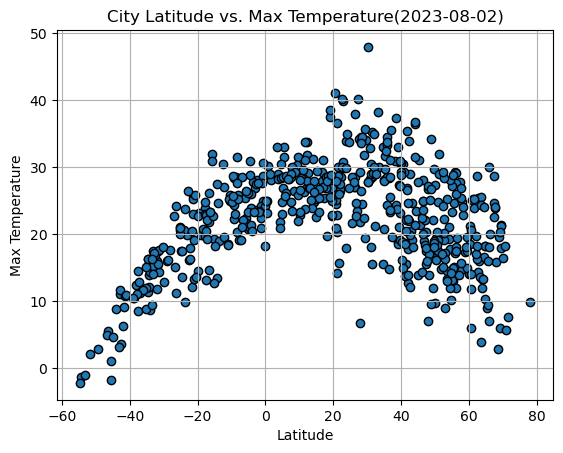

In [99]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

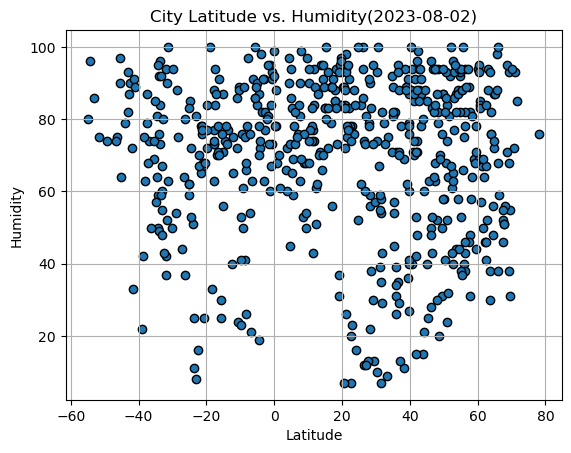

In [100]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

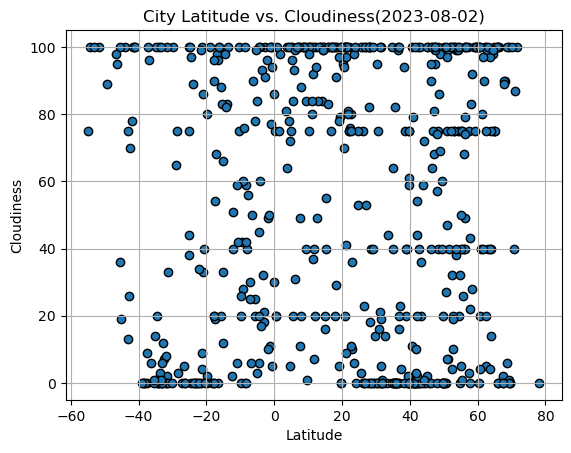

In [101]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

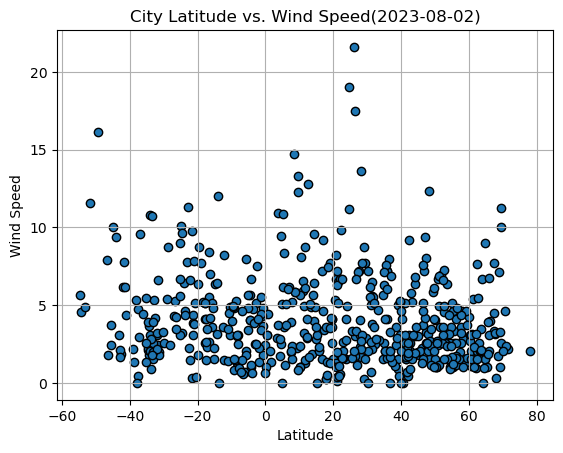

In [102]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [103]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line's y values
    regression_line = slope * x + intercept

    # Create scatter plot
    plt.scatter(x, y, marker='o', edgecolor='black', alpha=0.8)

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the equation of the regression line as a text annotation on the plot
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14, color="red")

    # Show plot
    plt.show()

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,haiku-pauwela,20.9219,-156.3051,24.47,84,20,6.69,US,1690964458
4,baracoa,20.3467,-74.4958,26.84,89,95,1.53,CU,1690964459
5,tromso,69.6496,18.9570,18.01,55,0,2.57,NO,1690964459
6,mil'kovo,55.6078,37.7956,24.73,66,26,3.37,RU,1690964460
7,jamestown,42.0970,-79.2353,12.80,96,0,0.45,US,1690964461


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.20,74,96,9.60,SH,1690964456
1,west island,-12.1568,96.8225,26.99,65,40,8.23,CC,1690964457
2,olinda,-8.0089,-34.8553,25.85,78,40,3.09,BR,1690964458
8,waitangi,-43.9535,-176.5597,8.79,79,100,9.39,NZ,1690964461
10,fale old settlement,-9.3852,-171.2468,28.40,76,42,4.79,TK,1690964463


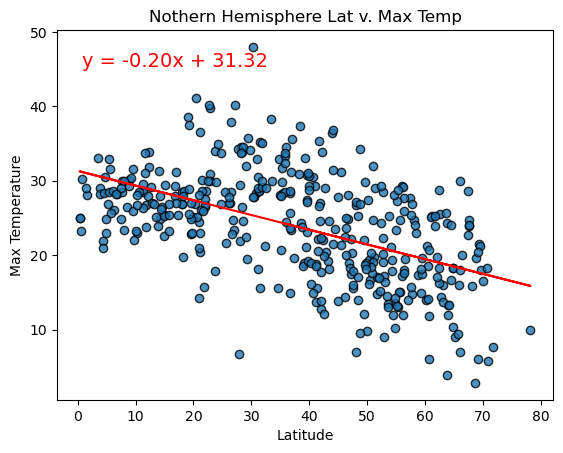

In [106]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
plt.title("Nothern Hemisphere Lat v. Max Temp" )

linear_regression_plot(x, y, x_label, y_label)

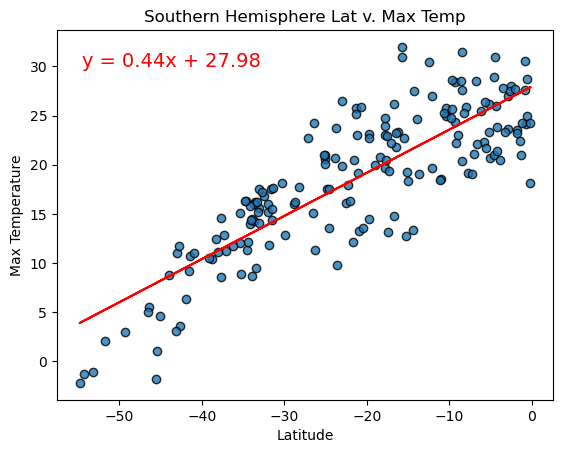

In [107]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
plt.title("Southern Hemisphere Lat v. Max Temp")
linear_regression_plot(x, y, x_label, y_label)

In northern hemisphere, the maxium temperature decreases when latitude increases.
In southern hemisphere, the maxium temperaure increseses when latitude increases.
However, the maxium temperature is impacted less by latitude when comparing with the southern hemisphere. The maxiumm temperature in same latiude range can be more varied in northeen hemisphere.

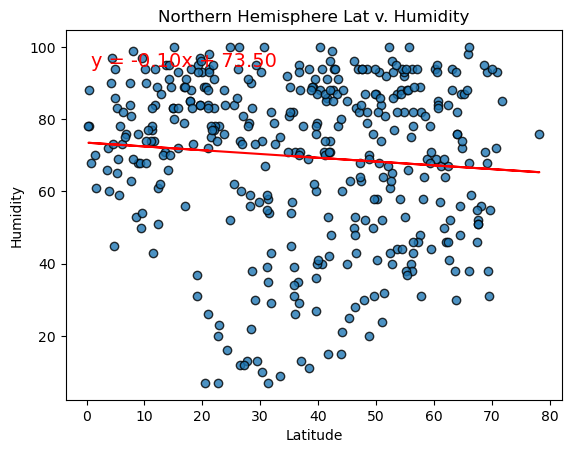

In [108]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
plt.title("Northern Hemisphere Lat v. Humidity" )

linear_regression_plot(x, y, x_label, y_label)

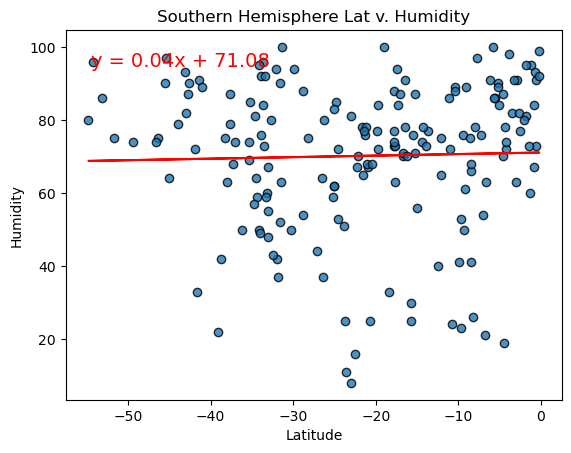

In [109]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
plt.title("Southern Hemisphere Lat v. Humidity")

linear_regression_plot(x, y, x_label, y_label)


In both the northern and southern hemispheres, latitude is not obviously related to humidity. The humidity value varies across all latitude ranges. There are a few latitude ranges that have more cities with low humidity: latitude 20 to 50 and latitude -30 to 0. Also from the markers amount on the plots, it is obvious that there are more cities in northern hemisphere since there is more land in northern hemisphere. 

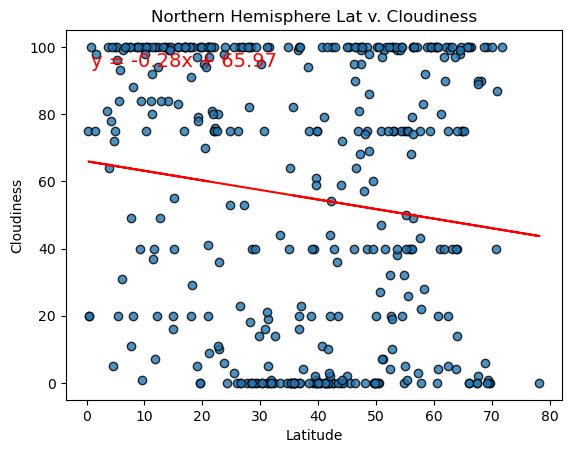

In [110]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
plt.title("Northern Hemisphere Lat v. Cloudiness" )

linear_regression_plot(x, y, x_label, y_label)

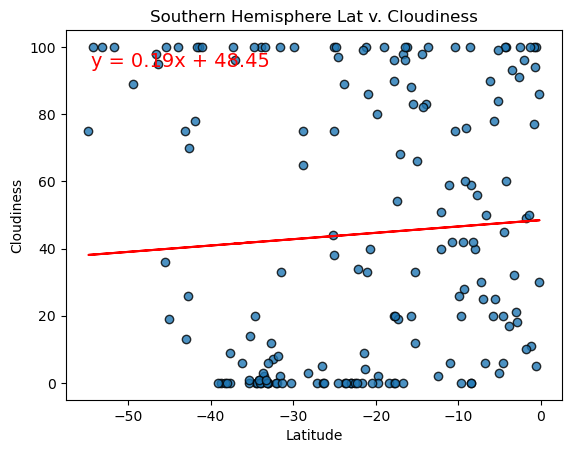

In [111]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
plt.title("Southern Hemisphere Lat v. Cloudiness")

linear_regression_plot(x, y, x_label, y_label)


In both northern and southern hemisphere, the cloudiness value is not significantly impacted by latidue except in some places with very high latitude. In northern hemisphere, the cloudiness is extremely low when latitude is over around 75. However, there is only one city with such high latitude in the whole data set and it cannot represet much information. Similar situdation can be found in the southern hemisphere's scatter plot. The cloudiness actually varies in all latitude range. There are only four cities with latitude lower then -50 and they all have quite high cloudiness value. Since there are only four cities in that latitude range, it cannot make the conlusion of that extremely high latitude in southern hemisphere can lead to high cloudiness value.

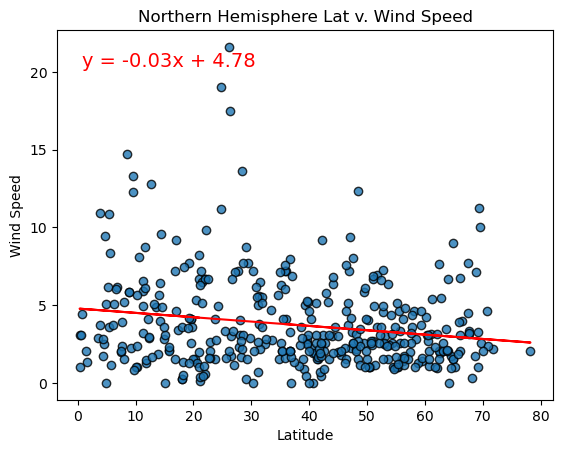

In [112]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
plt.title("Northern Hemisphere Lat v. Wind Speed" )
linear_regression_plot(x, y, x_label, y_label)

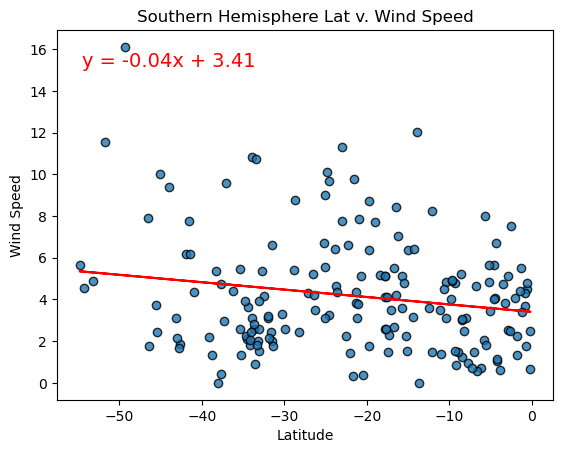

In [113]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
plt.title("Southern Hemisphere Lat v. Wind Speed" )
linear_regression_plot(x, y, x_label, y_label)

The plots show that Latitude can impact the wind speed. In northern hemisphere, high wind speed appears more in the cities close to the equator. The wind speed decreases when latitude increases. In southern hemisphere, wind speed decreases when getting closer to equator.